# IANNwTF - Homework Week 2


In [ ]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


## 1 Preparation
For this homework you will use sigmoid as an activation function. Think about the
following questions (you do not have to hand in the answers, they are just for your own
recap)

* What is the purpose of an activation function in NN in general?
* What’s the advantage of e.g. sigmoid over the step function (threshold function)?
* How does sigmoid look like (the formula as well as the graph)?
* What is the derivative of sigmoid?

Implement a function sigmoid(x) and a function sigmoidprime(x)

### Sigmoid function and its derivative

Mathematical definiton:

$\sigma(x) = \frac{1}{1+e^{-x}}$

Derivative (sigmoidprime):

$\sigma'(x)= \sigma(x)(1-\sigma(x))$

In [ ]:
def sigmoid(x):
  return (1 / (1+np.exp(-x)))

def sigmoidprime(x):
  return sigmoid(x)*(1-sigmoid(x))


## 2 Data Set

The training data set will consist of possible inputs and their corresponding labels.

We are training the network on logical gates (and, or, not and, not or, xor = exclusive
or). 
We will create the inputs and labels ourselves.

What are possible inputs to the logical gates?

For each of the logical gates you will need an array of labels (= the true solution that
the network is supposed to output), one corresponding to each input pair.

In [ ]:
# Define the input variables (4 combinations of 2 booleans)
input = np.array(
    [
      [0, 0],
      [0, 1],
      [1, 0],
      [1, 1],
    ]
)

# The logical gates take as input two binary digits (either 1 or 0), with all possible combinations there
# should be 4 input pairs. Put them in a 2D numpy array. (The shape of the array should be (4,2))
assert input.shape == (4, 2)

# You will need 5 arrays each containing 4 binary digits (0 or 1).
# 
labels_and    = np.array([0, 0, 0, 1])
labels_or     = np.array([0, 1, 1, 1])
labels_nand   = np.array([1, 1, 1, 0])
labels_nor    = np.array([1, 0, 0, 0])
labels_xor    = np.array([0, 1, 1, 0])

# Uncomment the following if you prefer having the values calculated :-)
#labels_and_c  = np.array([x[0] and x[1] for x in input])
#labels_or_c   = np.array([x[0] or x[1] for x in input])
#labels_nand_c = np.array([int(not (x[0] and x[1])) for x in input])
#labels_nor_c  = np.array([int(not (x[0] or x[1])) for x in input])
#labels_xor_c  = np.array([x[0] ^ x[1] for x in input])


# Optional part: Pretty printing the inputs and targets as Pandas data frame
df = pd.DataFrame(
    input, columns=["x1", "x2"]
)
df["AND"] = labels_and
df["OR"] = labels_or
df["NAND"] =labels_nand
df["NOR"] = labels_nor
df["XOR"] = labels_xor

df

,x1,x2,AND,OR,NAND,NOR,XOR
0,0,0,0,0,1,1,0
1,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1
3,1,1,1,1,0,0,0


### 3 Perceptron
Our multilayer-Perceptron will consist of single Perceptrons. So we will need a class
**Perceptron**. You can use the one that we have implemented together in the Flipped
Classroom Session (should also be uploaded) or create your own.

If you want to implement it yourself, think about what a Perceptron consists of.
When you create a Perceptron, it should receive an int input units with how many
weights are coming in to your Perceptron. It should also randomly assign weights and
the bias.
Also assign the learning rate alpha = 1. 

The Perceptron should have a function **forward_step(self, inputs)** that calculates
the activation of the perceptron. Use sigmoid as activation function.

Then you’ll need a function **update(self, delta)** which updates the parameters. To
do so, compute the gradients for weights and bias from the error term δ. (It was handed
over when the function was called in the backprop step function of the class MLP().)

Compute the gradients using:

> $ \frac{\partial L}{\partial w_{ij}^{(l)}} = \delta^{(l)}_i a_j^{(l-1)}$

And then update the parameters using:
> $ \theta_{new} = \theta_{old} - \alpha \nabla L_\theta $

In [ ]:
class Perceptron(object):

  def __init__(self, input_units, alpha = 1):
    """Initialise the weights, depending on the number of input units, a bias and learning rate alpha."""
    self.alpha = alpha

    self.weights = np.random.randn(input_units + 1) # add one unit for the bias
  
  def forward_step(self, inputs):
    """Compute the activation of the perceptron using the sigmoid activation function."""

    # prepend a 1 to the input because we have the bias incorporated in the weight matrix
    self.input = np.insert(inputs, 0, 1)

    self.drive = np.dot(self.weights, self.input)
    self.output = sigmoid(self.drive)

    return self.output

  def update(self, delta):
    """Update the weights and the bias of the perceptron by using the given delta."""
    gradients = delta * self.input
    self.weights -= self.alpha * gradients




### 4 Multi-Layer Perceptron

Further,  we  will  need  a  class MLP() that  can  perform  a  forward  and  backprop-step. Initialize the MLP with **1 hidden layer** that has **4 Perceptrons**.  Initialize **1 output neuron**. 

* In the forward_step process the inputs through the network.
* In the backprop_step update the parameters of the network.



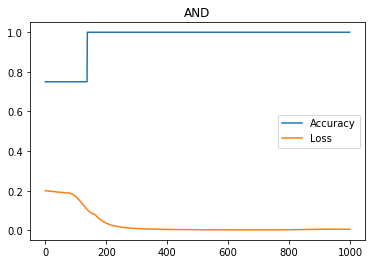

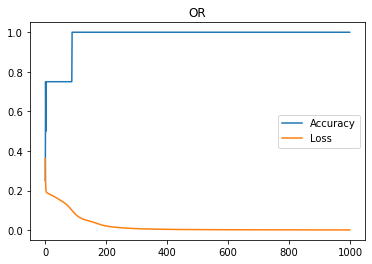

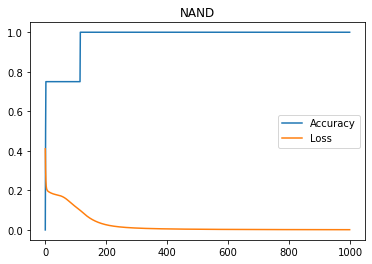

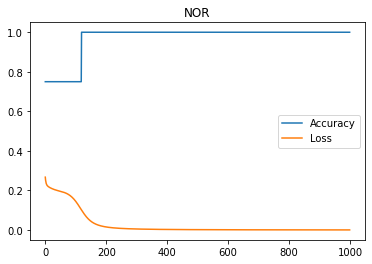

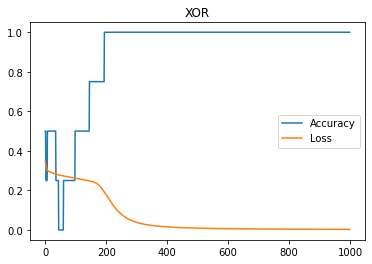

In [ ]:
class MLP(object):
  
  def __init__(self):
    """Initialise the layers of perceptrons"""
    # 4 Perceptrons in hidden layer and 1 in output layer
    self.hidden = [Perceptron(2) for i in range(4)]
    self.output = Perceptron(4)
  
  def forward_step(self, inputs):
    # First compute the activation of the perceptrons in the hidden layer
    self.hidden_output = np.array([p.forward_step(inputs) for p in self.hidden])

    # Then return the output of the perceptron in the ouput layer
    return self.output.forward_step(self.hidden_output)
  
  def backprop_step(self, inputs, target):
    """Backpropagate through the network and adjust the weights and biases"""
    
    # Compute the delta of the neuron in the ouput layer
    delta_output = (self.output.output-target)*sigmoidprime(self.output.drive)

    # Iterate through the neurons of the hidden layer and update the weights
    for i, p in enumerate(self.hidden):
      delta = delta_output * self.output.weights[i] * sigmoidprime(p.drive)
      p.update(delta)

    # Finally update the output neuron's weights as well
    self.output.update(delta_output)



def train_and_evaluate(labels, title):
  """Trains the Network on the target and plots the loss and accuracy for every epoch.
     This function is used to make the visualisation easier.
     
     labels - The list of target labels (e.g. one of labels_and, labels_or, etc.)
     title  - The title of the plot (e.g. "OR", "AND", etc.)

  """
  mlp = MLP()

  labels = labels.reshape((4, 1))
  epochs = 1000

  all_losses = []
  all_accs = []

  for epoch in range(epochs):
    losses = 0
    correct = 0 # number of correct predictions in this epoch

    # Iterate through the training samples
    for x1, x2, target in np.concatenate((input, labels), axis=1):
      pred = mlp.forward_step([x1, x2])
      mlp.backprop_step([x1, x2], target)

      # Loss function: Mean Squared Error (MSE)
      loss = (pred-target)**2
      losses += loss

      if round(pred) == target:
        correct += 1

    # Accuracy = number of correct predictions / total number of samples
    accuracy = correct / len(input)

    # Average the loss as well
    loss = losses / len(input)

    # Store losses and accuracies for the plot
    all_losses.append(loss)
    all_accs.append(accuracy)

  # Create and show the plot
  x = range(1000)
  plt.plot(x, all_accs, label="Accuracy")
  plt.plot(x, all_losses, label="Loss")
  plt.title(title)
  plt.legend()
  plt.show()

# Train, evaluate and plot for every logical gate
train_and_evaluate(labels_and, "AND")
train_and_evaluate(labels_or, "OR")
train_and_evaluate(labels_nand, "NAND")
train_and_evaluate(labels_nor, "NOR")
train_and_evaluate(labels_xor, "XOR")
